# ML Website with Streamlit:

### Star dataset to predict star types

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pickle import dump

#### Simple EDA

In [30]:
df = pd.read_csv("../data/raw/6_class_csv[1].csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [31]:
df.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

In [32]:
# Transform categoricals into numericals
df["Star color"] = pd.factorize(df["Star color"])[0]
df["Spectral Class"] = pd.factorize(df["Spectral Class"])[0]

df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0


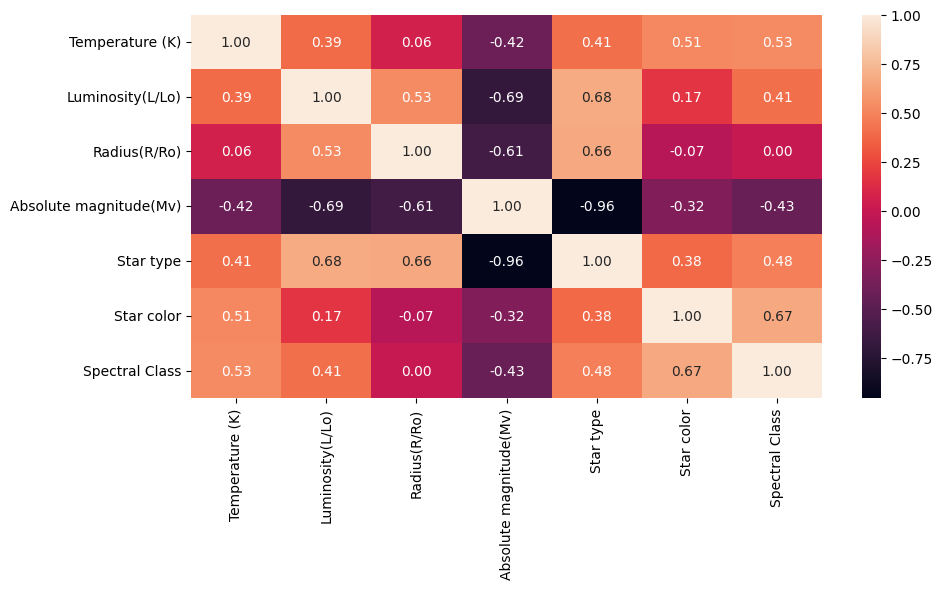

In [33]:
# Correlation map
fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(df[["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)", "Star type", "Star color", "Spectral Class"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()


#### Create Random Forest Classifier model

In [34]:

X = df.drop(["Star type", "Star color", "Spectral Class"], axis=1)
y = df["Star type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71)

model = RandomForestClassifier(n_estimators=100, random_state=71)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
accuracy

dump(model, open("../models/RandomForestClass_100_71", "wb"))